<a href="https://www.kaggle.com/code/willianjose/how-can-a-wellness-tech-company-play-it-smart?scriptVersionId=136462133" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteCaloriesNarrow_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteIntensitiesWide_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteMETsNarrow_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteSleep_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteStepsNarro

## Case Study 2: How Can a Wellness Technology Company Play It Smart?

### Scenario
I'm a data analyst working on the marketing analyst team at Bellabeat, a high-tech manufacturer of health-focused
products for women. Bellabeat is a successful small company, but they have the potential to become a larger player in the
global smart device market. Urška Sršen, cofounder and Chief Creative Officer of Bellabeat, believes that analyzing smart
device fitness data could help unlock new growth opportunities for the company. You have been asked to focus on one of
Bellabeat’s products and analyze smart device data to gain insight into how consumers are using their smart devices. The
insights you discover will then help guide marketing strategy for the company. You will present your analysis to the Bellabeat
executive team along with your high-level recommendations for Bellabeat’s marketing strategy.

### About the company
Bellabeat is a high-tech company founded by Urška Sršen and Sando Mur that specializes in manufacturing health-focused smart products. Sršen's artistic background played a crucial role in the development of beautifully designed technology that aims to inform and inspire women worldwide. By collecting data on various aspects of women's health, including activity, sleep, stress, and reproductive health, Bellabeat empowers women with valuable knowledge about their own well-being and habits. Since its establishment in 2013, Bellabeat has experienced rapid growth and established itself as a prominent tech-driven wellness company catering specifically to women.

By 2016, Bellabeat had expanded its operations globally and introduced multiple products to the market. Apart from their own e-commerce platform, Bellabeat made its products available through various online retailers. While the company has invested in traditional advertising channels such as radio, billboards, print, and television, its primary focus lies in digital marketing. Bellabeat consistently engages with consumers through Google Search, active Facebook and Instagram pages, and regular interactions on Twitter. Additionally, the company utilizes video ads on YouTube and display ads on the Google Display Network to support marketing campaigns centered around key dates in the industry.

## Ask
Sršen asks you to analyze smart device usage data in order to gain insight into how consumers use non-Bellabeat smart
devices. She then wants you to select one Bellabeat product to apply these insights to in your presentation.

In [2]:
%config Completer.use_jedi = False

## Prepare
Loading data from kaggle

In [3]:
dailyAct = pd.read_csv('/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv')
sleepDay = pd.read_csv('/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv')
hourlySteps = pd.read_csv('/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv')

In [4]:
dailyAct.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [5]:
sleepDay.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [6]:
hourlySteps.head()

,Id,ActivityHour,StepTotal
0,1503960366,4/12/2016 12:00:00 AM,373
1,1503960366,4/12/2016 1:00:00 AM,160
2,1503960366,4/12/2016 2:00:00 AM,151
3,1503960366,4/12/2016 3:00:00 AM,0
4,1503960366,4/12/2016 4:00:00 AM,0


## Process
Processing data before analysis

In [7]:
# Verificar valores ausentes
print(dailyAct.isna().sum())
print('\n')
print(sleepDay.isna().sum())
print('\n')
print(hourlySteps.isna().sum())

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64


Id                    0
SleepDay              0
TotalSleepRecords     0
TotalMinutesAsleep    0
TotalTimeInBed        0
dtype: int64


Id              0
ActivityHour    0
StepTotal       0
dtype: int64


In [8]:
print(dailyAct.shape)
print(sleepDay.shape)
print(hourlySteps.shape)

(940, 15)
(413, 5)
(22099, 3)


In [9]:
# Verificando as colunas
#print(dailyAct.columns)

In [10]:
# Verificando os tipos
print(dailyAct.dtypes)
# print(sleepDay.dtypes)
# print(hourlySteps.dtypes)

Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object


In [11]:
# Convertendo os tipos de data
dailyAct['ActivityDate'] = pd.to_datetime(dailyAct['ActivityDate'], format='%m/%d/%Y')
sleepDay['SleepDay'] = pd.to_datetime(sleepDay['SleepDay'], format='%m/%d/%Y %I:%M:%S %p')
hourlySteps['ActivityHour'] = pd.to_datetime(hourlySteps['ActivityHour'], format='%m/%d/%Y %I:%M:%S %p')

In [12]:
# Verificando as conversões
dailyAct.head()
# sleepDay.head()
# hourlySteps.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [13]:
# Unindo os dataframes com base na coluna 'Id' e nas colunas 'ActivityDate' e 'SleepDay'
daily_activity_sleep = pd.merge(dailyAct, sleepDay, left_on=['Id', 'ActivityDate'], right_on=['Id', 'SleepDay'])

In [14]:
# Verificando o uso do merge 
print(daily_activity_sleep.shape)
# Resultado é um join

(413, 19)


## Analyze
Exploring data with a few tables

In [15]:
# Calcular as médias diárias
daily_average = daily_activity_sleep.groupby("Id").agg(
    mean_daily_steps=("TotalSteps", "mean"),
    mean_daily_calories=("Calories", "mean"),
    mean_daily_sleep=("TotalMinutesAsleep", "mean")
).reset_index()

# Arredondar para duas casas decimais
daily_average = daily_average.round(decimals=2)

# Exibir as primeiras linhas do resultado
print(daily_average.head())

           Id  mean_daily_steps  mean_daily_calories  mean_daily_sleep
0  1503960366          12405.68              1872.28            360.28
1  1644430081           7967.75              2977.75            294.00
2  1844505072           3477.00              1676.33            652.00
3  1927972279           1490.00              2316.20            417.00
4  2026352035           5618.68              1540.79            506.18


In [16]:
# Criar a coluna "user_type" com base nas condições
daily_average["user_type"] = pd.cut(
    daily_average["mean_daily_steps"],
    bins=[0, 5000, 7499, 9999, float("inf")],
    labels=["sedentary", "lightly active", "fairly active", "very active"],
    right=False
)

# Exibir as primeiras linhas do resultado
print(daily_average.head())

           Id  mean_daily_steps  mean_daily_calories  mean_daily_sleep  \
0  1503960366          12405.68              1872.28            360.28   
1  1644430081           7967.75              2977.75            294.00   
2  1844505072           3477.00              1676.33            652.00   
3  1927972279           1490.00              2316.20            417.00   
4  2026352035           5618.68              1540.79            506.18   

        user_type  
0     very active  
1   fairly active  
2       sedentary  
3       sedentary  
4  lightly active  


In [17]:
# Calcular a contagem e o percentual de cada "user_type"
user_type_counts = daily_average["user_type"].value_counts()
user_type_percentages = daily_average["user_type"].value_counts(normalize=True) * 100

# Criar a tabela
table = pd.DataFrame({"User Type": user_type_counts.index, "Count": user_type_counts, "Percentage": user_type_percentages})

# Exibir a tabela
print(table)

                     User Type  Count  Percentage
fairly active    fairly active      9   37.500000
sedentary            sedentary      5   20.833333
lightly active  lightly active      5   20.833333
very active        very active      5   20.833333


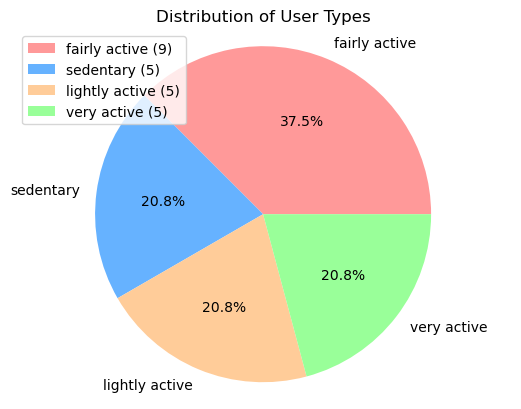

In [18]:
# Plotar o gráfico de pizza
colors = ["#FF9999", "#66B2FF", "#FFCC99", "#99FF99"]  # Cores para cada "user_type"
plt.pie(table["Percentage"], labels=table["User Type"], colors=colors, autopct="%1.1f%%")

# Adicionar a legenda com quadradinhos coloridos
legend_labels = [f"{label} ({count})" for label, count in zip(table["User Type"], table["Count"])]
plt.legend(labels=legend_labels, loc="upper left")

plt.axis("equal")  # Para manter o aspecto circular do gráfico
plt.title("Distribution of User Types")
plt.show()

In [19]:
# Adicionar a coluna "weekday" com base na data
daily_activity_sleep["weekday"] = pd.to_datetime(daily_activity_sleep["ActivityDate"]).dt.day_name()

# Ordenar os dias da semana
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
daily_activity_sleep["weekday"] = pd.Categorical(daily_activity_sleep["weekday"], categories=weekday_order, ordered=True)

# Calcular as médias diárias de passos e sono por dia da semana
weekday_steps_sleep = daily_activity_sleep.groupby("weekday").agg(
    daily_steps=("TotalSteps", "mean"),
    daily_sleep=("TotalMinutesAsleep", "mean")
).reset_index()

# Exibir as primeiras linhas do resultado
print(weekday_steps_sleep.head())

     weekday  daily_steps  daily_sleep
0     Monday  9339.851064   418.829787
1    Tuesday  9182.692308   404.538462
2  Wednesday  8022.863636   434.681818
3   Thursday  8205.353846   402.369231
4     Friday  7901.403509   405.421053


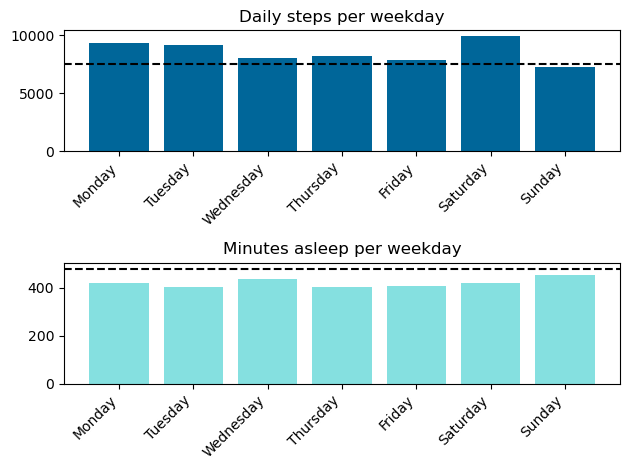

In [20]:
# Definir as cores
color_steps = "#006699"
color_sleep = "#85e0e0"

# Criar o gráfico de barras para os passos diários
plt.subplot(2, 1, 1)
plt.bar(weekday_steps_sleep["weekday"], weekday_steps_sleep["daily_steps"], color=color_steps)
plt.axhline(y=7500, color="black", linestyle="--")
plt.title("Daily steps per weekday")
plt.xlabel("")
plt.ylabel("")
plt.xticks(rotation=45, ha="right")

# Criar o gráfico de barras para o sono diário
plt.subplot(2, 1, 2)
plt.bar(weekday_steps_sleep["weekday"], weekday_steps_sleep["daily_sleep"], color=color_sleep)
plt.axhline(y=480, color="black", linestyle="--")
plt.title("Minutes asleep per weekday")
plt.xlabel("")
plt.ylabel("")
plt.xticks(rotation=45, ha="right")

# Ajustar o layout e exibir o gráfico
plt.tight_layout()
plt.show()

In [21]:
# Converter a coluna "ActivityHour" em formato de data e hora
hourlySteps["date"] = pd.to_datetime(hourlySteps["ActivityHour"]).dt.date
hourlySteps["time"] = pd.to_datetime(hourlySteps["ActivityHour"]).dt.time

# Exibir as primeiras linhas do resultado
print(hourlySteps.head())

           Id        ActivityHour  StepTotal        date      time
0  1503960366 2016-04-12 00:00:00        373  2016-04-12  00:00:00
1  1503960366 2016-04-12 01:00:00        160  2016-04-12  01:00:00
2  1503960366 2016-04-12 02:00:00        151  2016-04-12  02:00:00
3  1503960366 2016-04-12 03:00:00          0  2016-04-12  03:00:00
4  1503960366 2016-04-12 04:00:00          0  2016-04-12  04:00:00


Id                       int64
ActivityHour    datetime64[ns]
StepTotal                int64
date                    object
time                    object
dtype: object


/tmp/ipykernel_20/172688129.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hourly_average_steps = hourlySteps.groupby("time").mean()["StepTotal"]


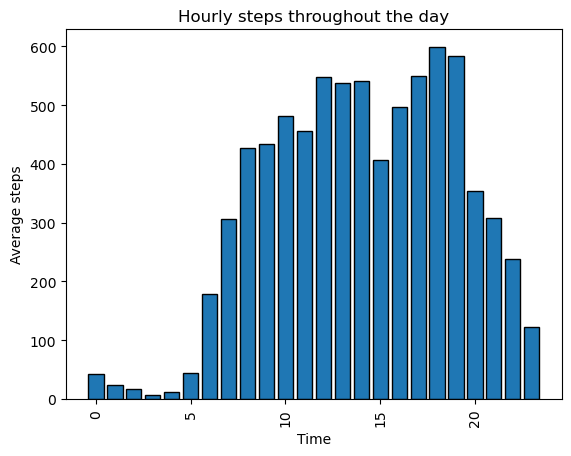

In [22]:
print(hourlySteps.dtypes)

# Extrair os dois primeiros dígitos da coluna "time"
hourlySteps["time"] = hourlySteps["time"].apply(lambda x: int(str(x)[:2]))

# Calcular a média de passos por hora
hourly_average_steps = hourlySteps.groupby("time").mean()["StepTotal"]

# Criar o gráfico de barras
plt.bar(hourly_average_steps.index, hourly_average_steps, edgecolor="black")
plt.title("Hourly steps throughout the day")
plt.xlabel("Time")
plt.ylabel("Average steps")
plt.xticks(rotation=90)

plt.show()

Text(0, 0.5, 'Minutes asleep')

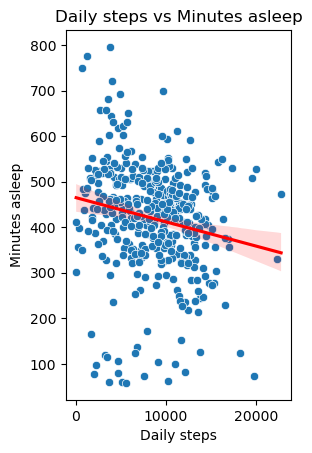

In [23]:
# Primeiro gráfico
plt.subplot(121)
sns.scatterplot(data=daily_activity_sleep, x='TotalSteps', y='TotalMinutesAsleep')
sns.regplot(data=daily_activity_sleep, x='TotalSteps', y='TotalMinutesAsleep', scatter=False, color='red')
plt.title('Daily steps vs Minutes asleep')
plt.xlabel('Daily steps')
plt.ylabel('Minutes asleep')

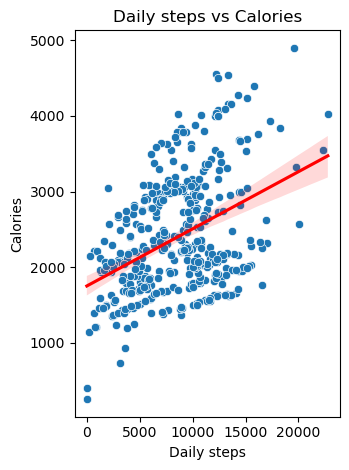

In [24]:
# Segundo gráfico
plt.subplot(122)
sns.scatterplot(data=daily_activity_sleep, x='TotalSteps', y='Calories')
sns.regplot(data=daily_activity_sleep, x='TotalSteps', y='Calories', scatter=False, color='red')
plt.title('Daily steps vs Calories')
plt.xlabel('Daily steps')
plt.ylabel('Calories')

plt.tight_layout()
plt.show()

In [25]:
daily_use = daily_activity_sleep.groupby('Id').size().reset_index(name='days_used')
daily_use['usage'] = pd.cut(daily_use['days_used'], bins=[0, 10, 20, 31], labels=['low use', 'moderate use', 'high use'])

print(daily_use.head())

           Id  days_used     usage
0  1503960366         25  high use
1  1644430081          4   low use
2  1844505072          3   low use
3  1927972279          5   low use
4  2026352035         28  high use


In [26]:
# Calcular a contagem de 'usage'
usage_count = daily_use['usage'].value_counts().reset_index()
usage_count.columns = ['usage', 'count']

# Calcular a porcentagem
total_count = usage_count['count'].sum()
usage_count['percentage'] = (usage_count['count'] / total_count) * 100

print(usage_count)

          usage  count  percentage
0      high use     11   47.826087
1       low use      9   39.130435
2  moderate use      3   13.043478


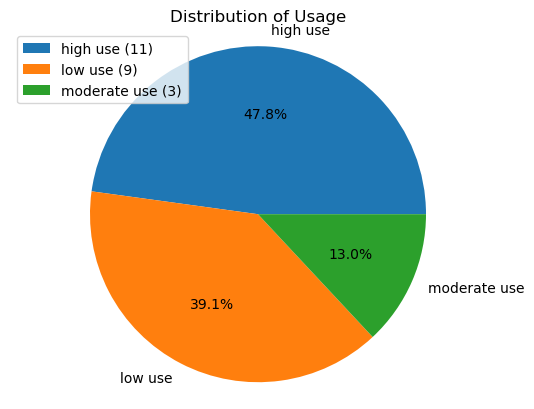

In [27]:
# Montando o gráfico de pizza
plt.pie(usage_count['count'], labels=usage_count['usage'], autopct='%1.1f%%')

# Adicionando a legenda com a contagem
legend_labels = [f"{usage} ({count})" for usage, count in zip(usage_count['usage'], usage_count['count'])]
plt.legend(labels=legend_labels, loc='upper left')

plt.axis('equal')  # Para manter o aspecto circular do gráfico
plt.title('Distribution of Usage')
plt.show()

In [28]:
daily_use_merged = pd.merge(dailyAct, daily_use, on='Id')
daily_use_merged.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,days_used,usage
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,25,high use
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,25,high use
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,25,high use
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,25,high use
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,25,high use


In [29]:
minutes_worn = daily_use_merged.copy()
minutes_worn['total_minutes_worn'] = (minutes_worn['VeryActiveMinutes'] + minutes_worn['FairlyActiveMinutes'] +
                                       minutes_worn['LightlyActiveMinutes'] + minutes_worn['SedentaryMinutes'])

minutes_worn['percent_minutes_worn'] = (minutes_worn['total_minutes_worn'] / 1440) * 100

minutes_worn['worn'] = pd.cut(minutes_worn['percent_minutes_worn'], bins=[0, 50, 100, float("inf")], 
                              labels=['Less than half day', 'More than half day', 'All day'], right=False)

#minutes_worn.loc[minutes_worn['percent_minutes_worn'] == 100, 'worn'] = 'All day'

#minutes_worn.loc[]

minutes_worn.head()


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,days_used,usage,total_minutes_worn,percent_minutes_worn,worn
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,25,high use,1094,75.972222,More than half day
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,25,high use,1033,71.736111,More than half day
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,25,high use,1440,100.000000,All day
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,25,high use,998,69.305556,More than half day
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,25,high use,1040,72.222222,More than half day


In [30]:
# Calcular a contagem de 'worn'
worn_count = minutes_worn['worn'].value_counts().reset_index()
worn_count.columns = ['worn', 'count']

# Calcular a porcentagem
total_count = worn_count['count'].sum()
worn_count['percentage'] = (worn_count['count'] / total_count) * 100

# Arredondando a porcentagem
worn_count['percentage'] = worn_count['percentage'].round(decimals=2)

print(worn_count)

                 worn  count  percentage
0  More than half day    428       60.03
1             All day    260       36.47
2  Less than half day     25        3.51


In [31]:
# Copiando um dataframe e modificando para fazer as tabelas

# high usage
highUsage = minutes_worn.copy()
highUsage = highUsage.loc[highUsage['usage'] == 'high use']

print(highUsage.shape)

(339, 20)


In [32]:
# moderate usage
modUsage = minutes_worn.copy()
modUsage = modUsage.loc[modUsage['usage'] == 'moderate use']

print(modUsage.shape)

(75, 20)


In [33]:
# low usage
lowUsage = minutes_worn.copy()
lowUsage = lowUsage.loc[lowUsage['usage'] == 'low use']

print(lowUsage.shape)

(268, 20)


In [34]:
# Calcular a contagem de 'high usage'
high_worn_count = highUsage['worn'].value_counts().reset_index()
high_worn_count.columns = ['worn', 'count']

# Calcular a porcentagem
total_count_high = high_worn_count['count'].sum()
high_worn_count['percentage'] = (high_worn_count['count'] / total_count_high) * 100

# Arredondando a porcentagem
high_worn_count['percentage'] = high_worn_count['percentage'].round(decimals=2)

print(high_worn_count)

                 worn  count  percentage
0  More than half day    300       88.50
1             All day     25        7.37
2  Less than half day     14        4.13


In [35]:
# Calcular a contagem de 'mod usage'
mod_worn_count = modUsage['worn'].value_counts().reset_index()
mod_worn_count.columns = ['worn', 'count']

# Calcular a porcentagem
total_count_mod = mod_worn_count['count'].sum()
mod_worn_count['percentage'] = (mod_worn_count['count'] / total_count_mod) * 100

# Arredondando a porcentagem
mod_worn_count['percentage'] = mod_worn_count['percentage'].round(decimals=2)

print(mod_worn_count)

                 worn  count  percentage
0  More than half day     52       69.33
1             All day     20       26.67
2  Less than half day      3        4.00


In [36]:
# Calcular a contagem de 'low use'
low_worn_count = lowUsage['worn'].value_counts().reset_index()
low_worn_count.columns = ['worn', 'count']

# Calcular a porcentagem
total_count_low = low_worn_count['count'].sum()
low_worn_count['percentage'] = (low_worn_count['count'] / total_count_low) * 100

# Arredondando a porcentagem
low_worn_count['percentage'] = low_worn_count['percentage'].round(decimals=2)

print(low_worn_count)

                 worn  count  percentage
0             All day    215       80.22
1  More than half day     47       17.54
2  Less than half day      6        2.24


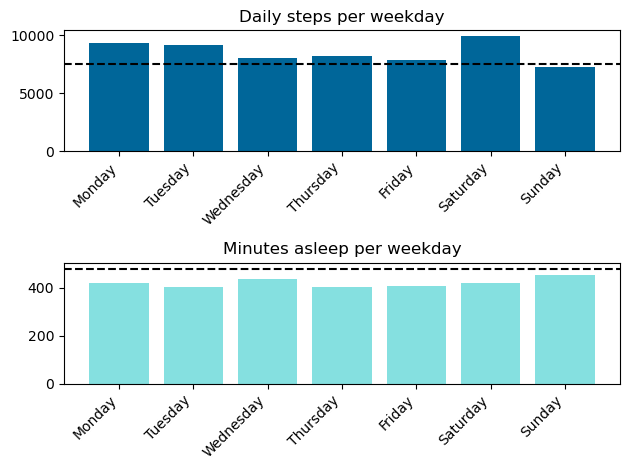

In [37]:
# Definir as cores
color_steps = "#006699"
color_sleep = "#85e0e0"

# Criar o gráfico de barras para os passos diários
plt.subplot(2, 1, 1)
plt.bar(weekday_steps_sleep["weekday"], weekday_steps_sleep["daily_steps"], color=color_steps)
plt.axhline(y=7500, color="black", linestyle="--")
plt.title("Daily steps per weekday")
plt.xlabel("")
plt.ylabel("")
plt.xticks(rotation=45, ha="right")

# Criar o gráfico de barras para o sono diário
plt.subplot(2, 1, 2)
plt.bar(weekday_steps_sleep["weekday"], weekday_steps_sleep["daily_sleep"], color=color_sleep)
plt.axhline(y=480, color="black", linestyle="--")
plt.title("Minutes asleep per weekday")
plt.xlabel("")
plt.ylabel("")
plt.xticks(rotation=45, ha="right")

# Ajustar o layout e exibir o gráfico
plt.tight_layout()
plt.show()

## Share
Share the view to the stakeholders

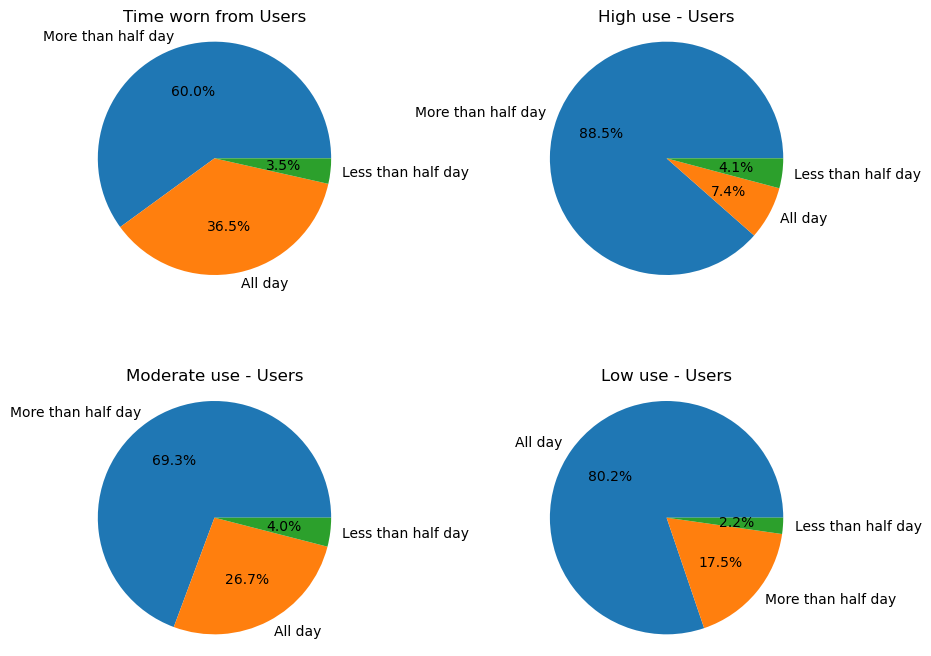

In [38]:
import matplotlib.pyplot as plt

# Cria a matriz de subplots com 2 linhas e 2 colunas
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Primeiro gráfico
axes[0, 0].pie(worn_count['percentage'], labels=worn_count['worn'], autopct='%1.1f%%')
axes[0, 0].axis('equal')
axes[0, 0].set_title('Time worn from Users')

# Segundo gráfico
axes[0, 1].pie(high_worn_count['percentage'], labels=high_worn_count['worn'], autopct='%1.1f%%')
axes[0, 1].axis('equal')
axes[0, 1].set_title('High use - Users')

# Terceiro gráfico
axes[1, 0].pie(mod_worn_count['percentage'], labels=mod_worn_count['worn'], autopct='%1.1f%%')
axes[1, 0].axis('equal')
axes[1, 0].set_title('Moderate use - Users')

# Quarto gráfico
axes[1, 1].pie(low_worn_count['percentage'], labels=low_worn_count['worn'], autopct='%1.1f%%')
axes[1, 1].axis('equal')
axes[1, 1].set_title('Low use - Users')

# Ajusta o espaçamento entre os subplots
plt.subplots_adjust(hspace=0.4, wspace=0.4)

# Exibe o gráfico completo
plt.show()


## Findings

* On all days except Sundays, users achieve the recommended daily step count of 7,500.
* Users fail to meet the recommended sleep duration of 8 hours.
* The activity level of users is highest between 8 am and 7 pm. Notably, they tend to walk more steps during lunchtime (12 pm to 2 pm) and in the evenings (5 pm to 7 pm).
* There is no discernible correlation between the number of steps taken each day and the duration of users' sleep.
* There is a positive correlation between the number of steps taken and the calories burned. It can be assumed that more steps lead to a higher calorie burn.
* Among the user population, only 7.4% wear their device all day, between 21 and 31 days. Additionally, 88.5% wear the device for more than half the day but not the entire day.
* Users who wear the device less frequently are classified as moderate users.
* On the days when low users wear their device, they tend to wear it for a longer duration.


## Conclusion
Based on above points, here are some suggestion for marketing strategy

* Individual Goal Tracking: Allow users to set individual goals for daily steps, calories burned or sleep duration. The app can track progress against these goals and provide personalized incentives and reminders to help them achieve them.

* Sharing Achievements on Social Media: Integrate the app with social media platforms such as Facebook or Instagram so that users can share their physical activity and sleep achievements. This will not only increase users' pride and motivation, but also promote the app to a wider audience.

* Nutrition and Wellness Tips: In addition to providing information about physical activity and sleep, offer users tips and guidance on healthy nutrition, stress management strategies, and other wellness practices. This will help users adopt a holistic lifestyle and improve their overall health.

* Application Customization: Allow users to customize the application as per their preferences and needs. They can choose from different themes, receive personalized reminders or even adapt notification settings based on their individual preferences.